<b>Le problème de Monty Hall</b>

In [63]:
# Pour afficher les graphiques dans la continuité du code, et non pas dans une fenêtre à part
%matplotlib inline

Importer :
<ul>
    <li>dans <b>random</b> : <i>randint</i> et <i>seed</i></li>
    <li>dans <b>enum</b> : <i>Enum</i></li>
    <li>dans <b>matplotlib</b> : <i>pyplot</i> en tant que <i>pyplot</i></li>
</ul>

In [64]:
from random import randint, seed
from enum import Enum
import matplotlib.pyplot as pyplot

Utiliser l'horloge système pour initialiser le générateur de nombres pseudo-aléatoires.

In [65]:
seed()

Définir <i>Strategie</i>, un enfant de <i>Enum</i> contenant les stratégies possibles.

In [125]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    ALEA = 3

Définir <i>play_game</i> : simuler une partie du jeu Monty Hall
<ul>
    <li><i>@param</i> : strategie (<b>Strategie</b>), la stratégie du participant</li>
    <li><i>@returns</i> : bool, Le participant a-t-il gagné ?</li>
    <li><b>Description :</b></li>
    <ul>
        <li>Simuler le choix de la porte par le participant</li>
        <li>Simuler l'élimination d'une mauvaise porte par le présentateur</li>
        <li>Simuler le choix final du participant en fonction de la stratégie du joueur</li>
    </ul>
</ul>

In [129]:
def play_game(strategie):
    if strategie == Strategie.ALEA:
        if randint(0, 1):
            strategie = Strategie.CHANGER
        else:
            strategie = Strategie.GARDER
    # Créer les portes, dont une gagnante
    portes = [0, 1, 2]
    bonne_porte = randint(0, 2)
    # Premier choix du participant
    premier_choix = randint(0, 2)
    # Elimination d'une porte par le présentateur
    portes.remove(premier_choix)
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0, 1)])
    else :
        portes = bonne_porte
    deuxieme_choix = []
    # Deuxième choix du participant
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Statégie non valide !")
    # Retourner le gain
    return deuxieme_choix == bonne_porte

Définir <i>play</i> : simule une suite de tours du jeu
<ul>
    <li><i>@param</i> :
    <ul>
        <li>strategie (<b>Strategie</b>), la stratégie du participant</li>
        <li>nb_tours (<b>int</b>), le nombre de tours</li>
    </ul>
    <li><i>@returns</i> : list, liste des gains du participant</li>
    <li><b>Description :</b></li>
    <ul>
        <li>Simuler plusieurs parties du jeu de Monty Hall</li>
        <li>Retourner les résultats sous forme d'une liste de gains</li>
    </ul>
</ul>

In [127]:
def play(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

<b>Analyse des résultats</b>

In [132]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties.".format(sum(play(Strategie.CHANGER, 10000))))
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties.".format(sum(play(Strategie.GARDER, 10000))))
print("En ayant une stratégie aléatoire, le joueur a gagné {} sur 10000 parties.".format(sum(play(Strategie.ALEA, 10000))))

En changeant de porte, le joueur a gagné 6678 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3329 sur 10000 parties.
En ayant une stratégie aléatoire, le joueur a gagné 5047 sur 10000 parties.


<b>Visualisation</b>

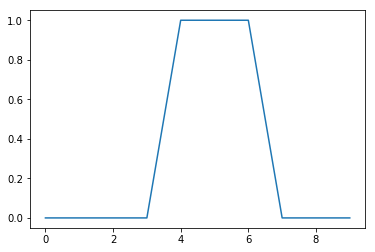

In [72]:
plot = pyplot.plot(play(Strategie.CHANGER, 10))

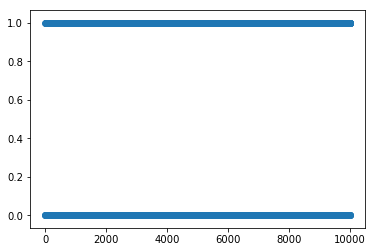

In [78]:
plot = pyplot.scatter(range(10000), play(Strategie.CHANGER, 10000))

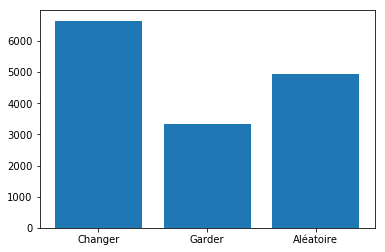

In [136]:
plot = pyplot.bar([1, 2, 3],
                  [sum(play(Strategie.CHANGER, 10000)),
                   sum(play(Strategie.GARDER, 10000)),
                   sum(play(Strategie.ALEA, 10000))], 
                  tick_label=["Changer", "Garder", "Aléatoire"])

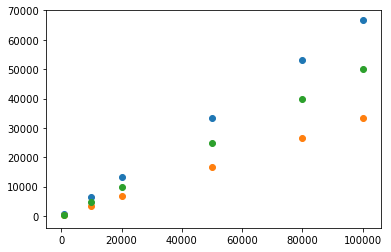

In [139]:
gains_changer = []
gains_garder = []
gains_alea = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    gains_alea.append(play(Strategie.ALEA, tours))
figure = pyplot.figure()
plot = pyplot.scatter(samples, [sum(x) for x in gains_changer])
plot = pyplot.scatter(samples, [sum(x) for x in gains_garder])
plot = pyplot.scatter(samples, [sum(x) for x in gains_alea])

[0.5, 3.5, 0, 1]

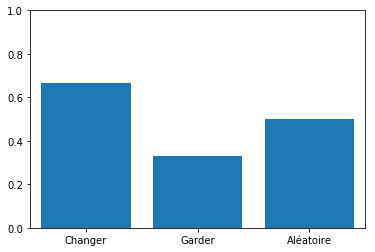

In [143]:
plot = pyplot.bar([1, 2, 3],
                  [sum(play(Strategie.CHANGER, 10000)) / 10000,
                   sum(play(Strategie.GARDER, 10000)) / 10000,
                   sum(play(Strategie.ALEA, 10000)) / 10000],
                  tick_label=["Changer", "Garder", "Aléatoire"])
pyplot.axis([0.5, 3.5, 0, 1])